# Importing the required data
- for now: use Excel to extract only 2015 total energy consumption per borough
    - upload table to 'data' in project
    - upload shapefiles to 'data': .shp .cpg .dbf .prj .shx (from https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)
    - upload population (density) csv table into  from https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough
- for real: 
    - download csv file
    - ...

In [3]:
#setup data folder (it probably already exists)
!mkdir data

mkdir: cannot create directory ‘data’: File exists


# Prepare for mapping
- download tools and libraries

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [6]:
import matplotlib

%matplotlib inline

In [7]:
#setup environment
!pip install geopandas

     |████████████████████████████████| 921kB 3.0MB/s eta 0:00:01     |████                            | 112kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 58kB/s  eta 0:00:01     |██████████▉                     | 501kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 8.4kB/s eta 0:00:01    |██████████████████████          | 8.1MB 1.6MB/s eta 0:00:03
     |████████████████████████████████| 10.1MB 9.7kB/s eta 0:00:01███████▋                 | 4.6MB 4.2MB/s eta 0:00:02 | 5.1MB 4.2MB/s eta 0:00:026.1MB 74kB/s eta 0:00:55


In [8]:
import geopandas as gp

In [9]:
!pip install pysal

     |████████████████████████████████| 25.0MB 11kB/s  eta 0:00:01    |█▉                              | 1.4MB 2.7MB/s eta 0:00:09     |████████▉                       | 6.9MB 4.7MB/s eta 0:00:04     |██████████▎                     | 8.0MB 4.7MB/s eta 0:00:04     |███████████████                 | 11.8MB 4.7MB/s eta 0:00:03
     |████████████████████████████████| 112kB 4.7MB/s eta 0:00:01
  Created wheel for pysal: filename=pysal-2.1.0-py2.py3-none-any.whl size=25333278 sha256=b487e3a24ddb2e786c02e44718e83dc530edcc88b78ded72bb0a341b1d474a83
  Stored in directory: /home/nbuser/.cache/pip/wheels/d3/83/3d/697615f4ce74486679f237d1d6a1cf70cd742fa6a34baba744
Successfully built pysal


In [10]:
!pip install descartes

In [11]:
import descartes

In [12]:
import pylab

pylab.rcParams['figure.figsize'] = (20., 16.)

# Look at data

In [13]:
#shapefiles
data_path = "./data/London_Borough_Excluding_MHW.shp"
londonBoroughs = gp.read_file(data_path)

londonBoroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


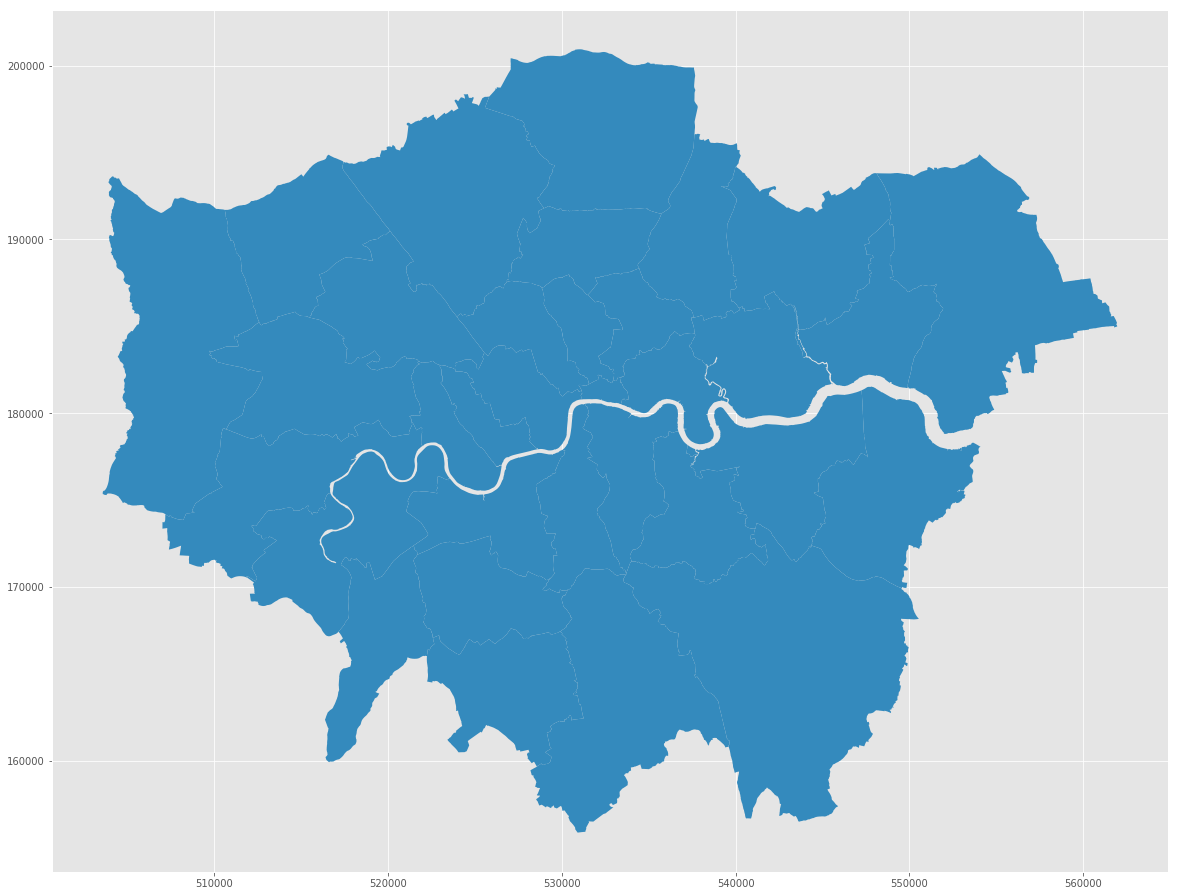

In [14]:
#checking how it looks
londonBoroughs.plot()

In [15]:
#energy
data_path = "./data/Energy_Borough.csv" #use csv file
energy = pd.read_csv(data_path)

energy.head()

,Code;Borrow;Energy
E09000002;Barking and Dagenham;210,7221687
E09000003;Barnet;466,1763401
E09000004;Bexley;370,2544748
E09000005;Brent;343,3979485
E09000006;Bromley;406,803441


In [16]:
#cleaning energy
energy.replace(';', ',', regex=True, inplace=True)
energy.head()

,Code;Borrow;Energy
E09000002;Barking and Dagenham;210,7221687
E09000003;Barnet;466,1763401
E09000004;Bexley;370,2544748
E09000005;Brent;343,3979485
E09000006;Bromley;406,803441


In [ ]:
energy.replace(',', '.', regex=True, inplace=True)
energy['Energy'] = energy['Energy'].replace(',', '.', regex=True)
energy.head()

In [17]:
#population
data_path = "./data/housing-density-borough.csv"
pop_density = pd.read_csv(data_path)

pop_density.head()

,Code,Name,Year,Source,Population,Inland_Area _Hectares,Total_Area_Hectares,Population_per_hectare,Square_Kilometres,Population_per_square_kilometre
0,E09000001,City of London,1999,ONS MYE,6581,290.4,314.9,22.7,2.9,2266.2
1,E09000001,City of London,2000,ONS MYE,7014,290.4,314.9,24.2,2.9,2415.3
2,E09000001,City of London,2001,ONS MYE,7359,290.4,314.9,25.3,2.9,2534.1
3,E09000001,City of London,2002,ONS MYE,7280,290.4,314.9,25.1,2.9,2506.9
4,E09000001,City of London,2003,ONS MYE,7115,290.4,314.9,24.5,2.9,2450.1


# Creating new category: Energy/Resident

In [18]:
#simplifying population dataset
pop_density.drop('Inland_Area _Hectares', axis=1, inplace=True)
pop_density.drop('Total_Area_Hectares', axis=1, inplace=True) 
pop_density.drop('Population_per_square_kilometre', axis=1, inplace=True)
pop_density.drop('Square_Kilometres', axis=1, inplace=True)
pop_density.rename(columns={'Year':'Pop_Year'}, inplace=True)
pop_density.rename(columns={'Source':'Pop_Source'}, inplace=True)

pop_density.head()

,Code,Name,Pop_Year,Pop_Source,Population,Population_per_hectare
0,E09000001,City of London,1999,ONS MYE,6581,22.7
1,E09000001,City of London,2000,ONS MYE,7014,24.2
2,E09000001,City of London,2001,ONS MYE,7359,25.3
3,E09000001,City of London,2002,ONS MYE,7280,25.1
4,E09000001,City of London,2003,ONS MYE,7115,24.5


In [ ]:
#merging Population estimates on energy dataset
pop_energy = energy.merge(pop_density, left_on='GSS_CODE', right_on='Code')

#energy per person
pop_energy['GWh/Resident'] = pop_energy['Energy']/pop_energy['Population']
pop_energy.head()

# Merging dataframe on geodataframe

In [ ]:
geoenergy = londonBoroughs.merge(pop_energy, left_on='GSS_CODE', right_on='Code')
            #geodataframe       #dataframe

In [ ]:
type(geoenergy)

geoenergy.head()

In [ ]:
#optionally saving to csv file
data_path = "./data/borough_energy.csv"

geoenergy.to_csv(data_path)

# Creating Choropleth Map with Legend

In [ ]:
original_crs = geoenergy.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geoenergy = geoenergy.to_crs(crs=target_crs)

In [ ]:
import numpy as np
import matplotlib

In [ ]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = cmap_discretize(cmap, ncolors)
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = matplotlib.pyplot.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def cmap_discretize(cmap, N):
    """
    Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)

    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0., 0., 0., 0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N + 1)
    cdict = {}
    for ki, key in enumerate(('red', 'green', 'blue')):
        cdict[key] = [(indices[i], colors_rgba[i - 1, ki], colors_rgba[i, ki]) for i in range(N+1)]
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d" % N, cdict, 1024)

In [ ]:
from pysal.viz.mapclassify import Quantiles

In [ ]:
breaks = Quantiles(
    geopeople['density'].values,
    k=5)
print(breaks)

In [ ]:
bar_labels = ['<=%i'% b for b in breaks.bins]
print(bar_labels)

In [ ]:
projected_geoenergy.plot(column='GWh/Resident', cmap='Blues', scheme='quantiles', k=5)
plt.title('20XX Energy Consumption per Resident by Ward')
plt.savefig('./data/ResidentEnergy.png')

cmap = plt.get_cmap('Blues')
colorbar_index(ncolors=5, cmap=cmap, shrink=0.5, labels=bar_labels)